In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
Alternative Fuel Vehicles US
---
---

Dataset

In [259]:
df = pd.read_csv('../Datasets/Alternative Fuel Vehicles US.csv')

In [212]:
df.head(5)

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,...,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [213]:
df.shape

(882, 22)

El dataset cuenta con 882 filas de datos y con 22 columnas

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [252]:
# Obtener el conteo de nulos por columna de df
null_count = df.isnull().sum()

# Obtener el porcentaje de nulos por columna
null_percentage = (df.isnull().mean()) * 100

# Crear un nuevo DataFrame con la información de conteo y porcentaje
null_info = pd.DataFrame({
    'Nulos': null_count,
    'Porcentaje': null_percentage
})

# Imprimir el nuevo DataFrame
print(null_info)

                                    Nulos  Porcentaje
Category                                0    0.000000
Model                                   0    0.000000
Model Year                            288   32.653061
Manufacturer                            0    0.000000
Fuel                                    0    0.000000
All-Electric Range                    660   74.829932
PHEV Total Range                      839   95.124717
Alternative Fuel Economy City         713   80.839002
Alternative Fuel Economy Highway      713   80.839002
Alternative Fuel Economy Combined     620   70.294785
Conventional Fuel Economy City        438   49.659864
Conventional Fuel Economy Highway     438   49.659864
Conventional Fuel Economy Combined    438   49.659864
Transmission Type                     242   27.437642
Transmission Make                     757   85.827664
Engine Type                           293   33.219955
Engine Size                           293   33.219955
Engine Cylinder Count       

In [282]:
#resetear los valores por defecto de sns
sns.reset_defaults()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\414668531.py:14: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


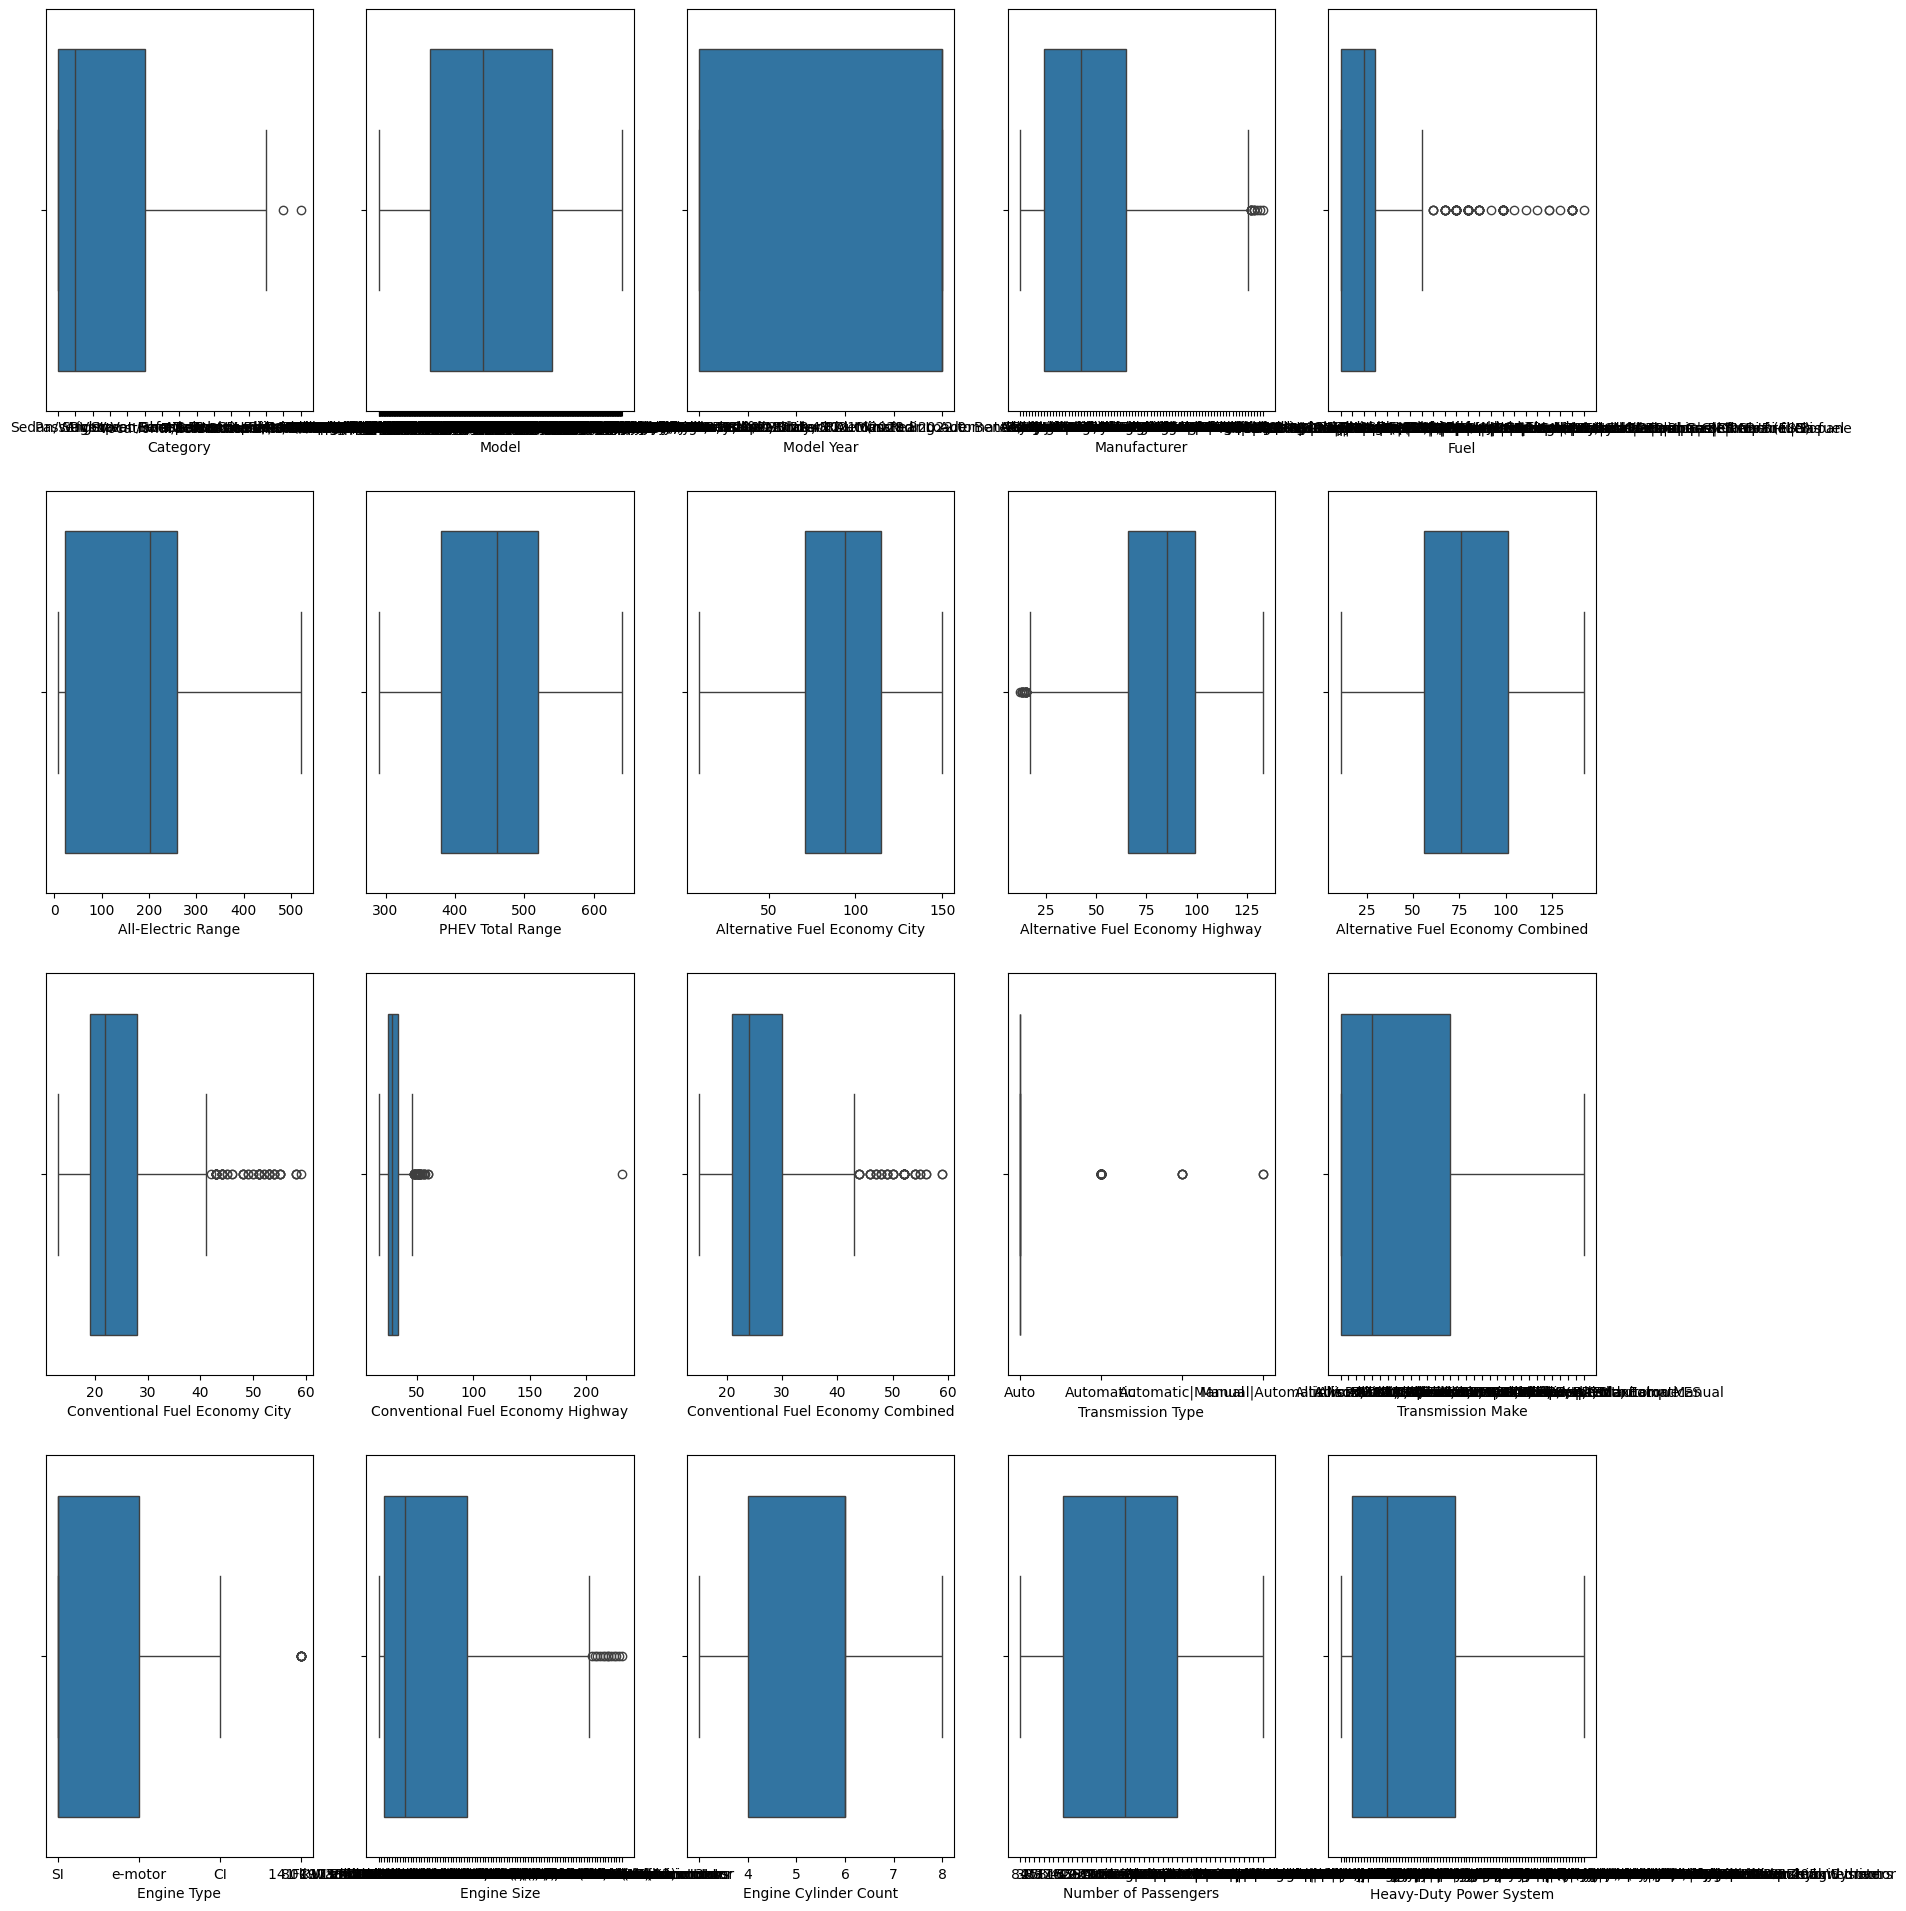

In [281]:
# Configurar la figura con X columnas y Y filas
fig, axes = plt.subplots(4, 5, figsize=(20, 24))


# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Crear un boxplot para cada variable
for i, col in enumerate(df.columns[:20]):  # Asegúrate de tener 20 columnas
    sns.boxplot(data=df, x=col, ax=axes[i])
    # axes[i].set_title(col)

# Ajustar el layout para evitar solapamiento
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Se puede observar que existe gran cantidad de nulos en las columnas que se encuentran en el dataset, esto se debe a que las columnas son específicas para cada tipo de vehículos, por lo tanto, cuando el dato pertenece a un vehiculo y la columna no, no existe un dato para esa columna.

Las columnas Fuel, transmision type, conventional fuel economy city, conventional fuel economy hoghway, conventional fuel economy combined, transmission type y engine size contienen datos outliers, se puede apreciar en el gráfico de boxplots
La columna transmission type no tiene gran cantidad de variabilidad de los datos, sin embargo solo hay 4 valores dentro de la columna, se analizará más adelante.

In [217]:
df['Transmission Type'].unique()

array(['Auto', nan, 'Automatic', 'Automatic|Manual', 'Manual|Automatic'],
      dtype=object)

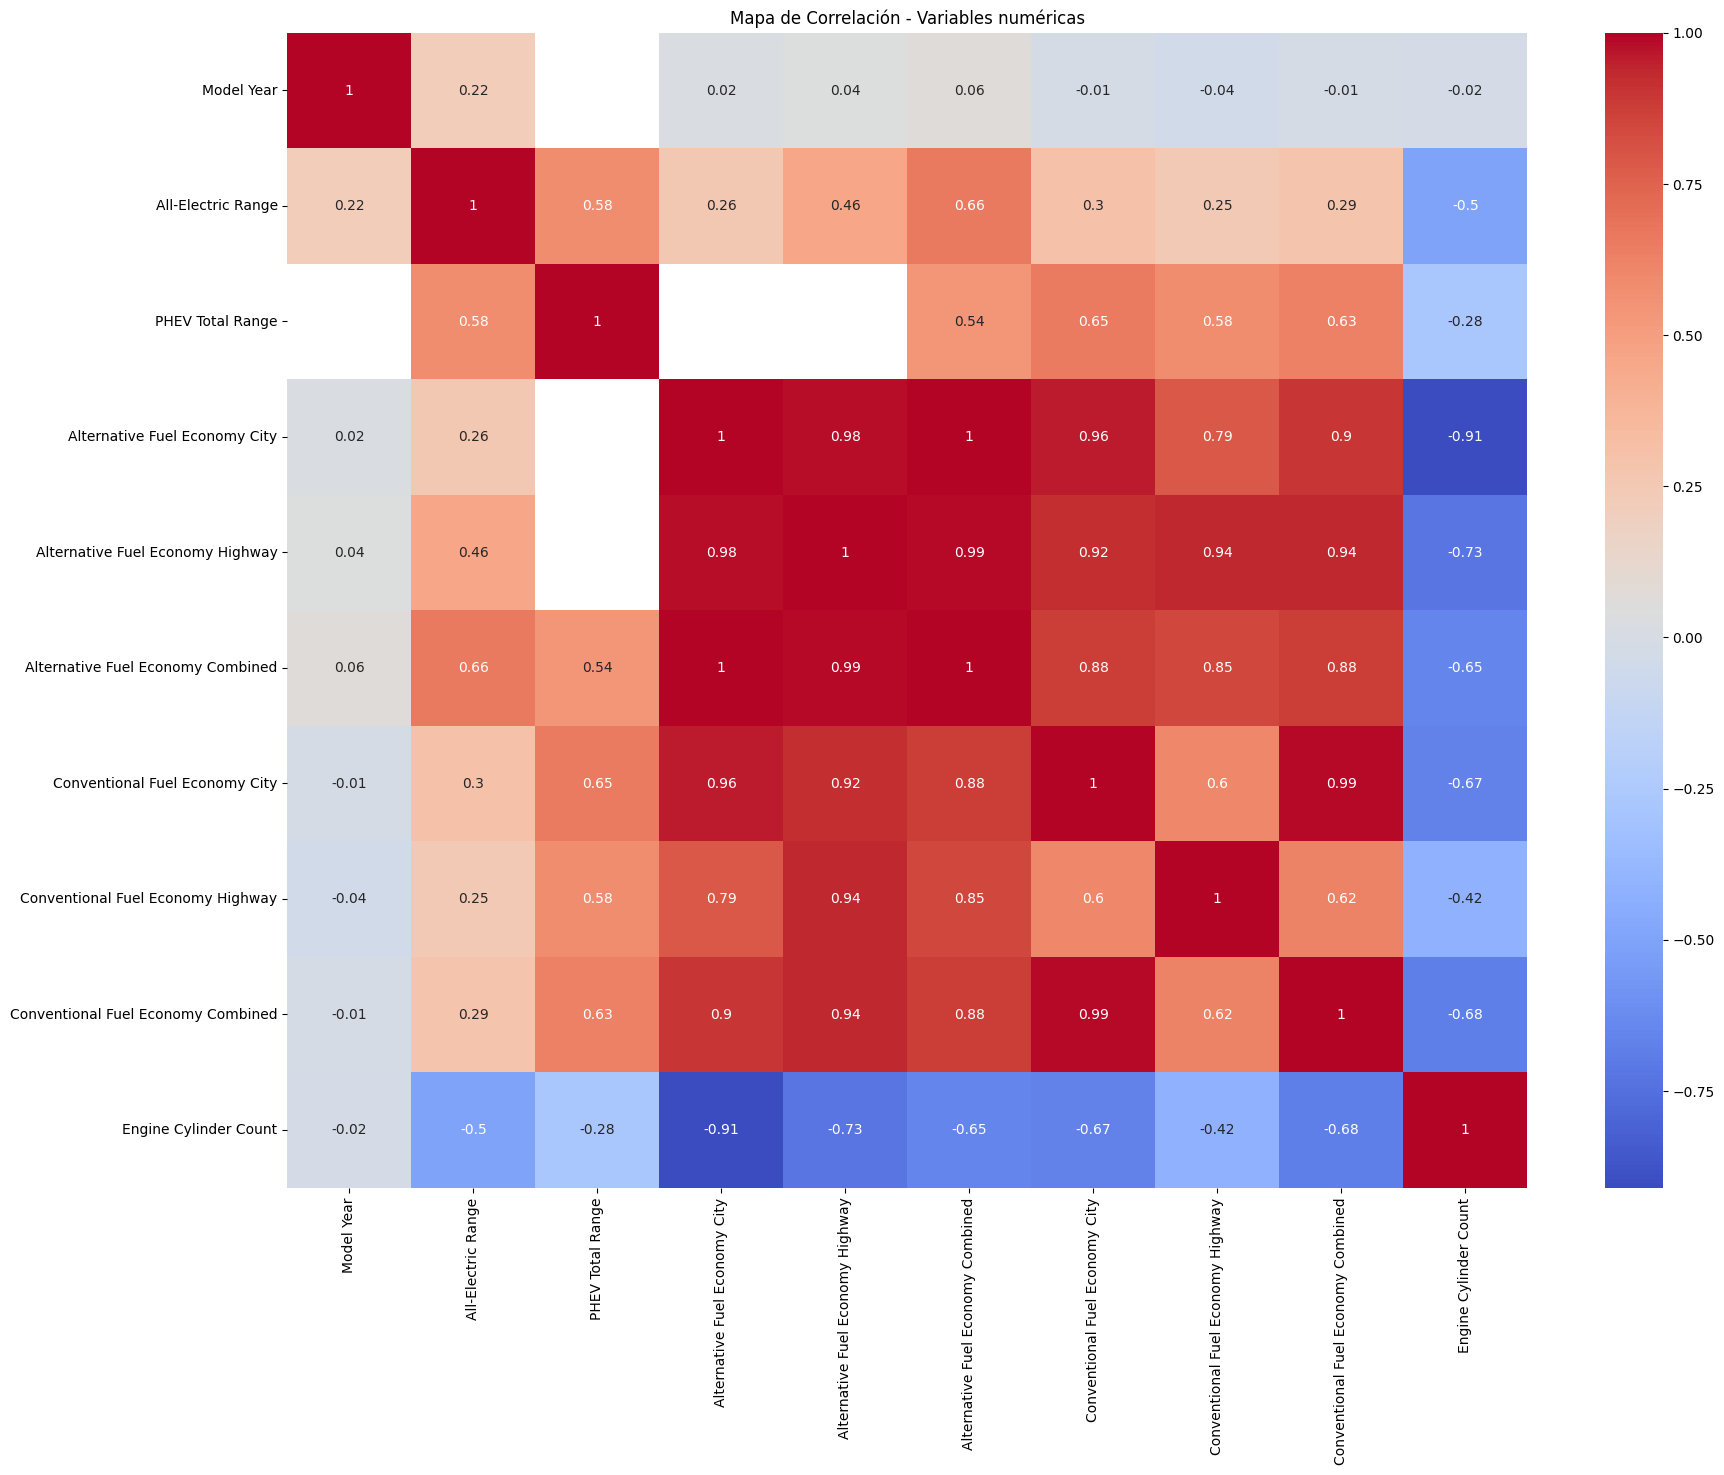

In [283]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

- Observando el mapa de correlaciones, se puede apreciar que Conventional Fuel Economy Combined, tiene gran correlación con Conventional Fuel Economy City, combines y Highway, aunque en realidad ambas columnas no se relacionan una con la ptra por lo que se descarta la informacion.
- Una columna dentro del dataset que nos interesa conocer a detalle es que todos los rangos electricos se correlacionan en un 0.66 con Economia del combustible en forma combinada por lo que se puede deducir que mientras el coche sea totalmente electrico, mayr sera la eficiencia de combustible  de forma combinada.
- En cuanto a los números de cilindros del motor se puede observar que existen correlaciones negativas, es decir que mientras mas cilindros tengan los automóviles, menor sera la eficiencia del combustible, una aseveración muy lógica para tal caso, especificamente, en ciudad, combinado y carretera. esta correlación aplica para autos con uso de combustible convencionales y para autos con conbustible alternativo. 

---
Manufacturer - Ensambladoras
---
---

Dado que en la columna Manufacturar existen demasiadas fabricas ensambladoras de los autos, se procede a realizar un top 10 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\7898214.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="bright")


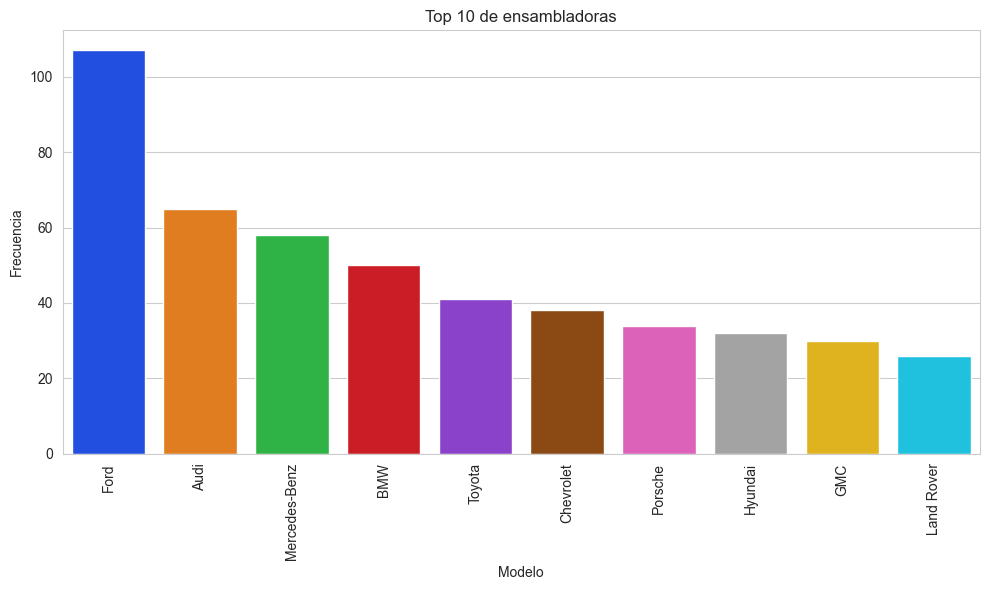

In [219]:
# top de 10 de fabricas ensambladoras
top_10 = df['Manufacturer'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette="bright")
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.title('Top 10 de ensambladoras')
plt.xticks(rotation=90) 
plt.tight_layout() 
sns.set_style("whitegrid") 
plt.show()


En primer lugar la ensabladora FORD es aquella que presomina en el mercado, seguido de AUDI, Mercedes-Benz, BMW, Toyota, Chevrolet, Porsche, Hyundai, GMC y Land Rover en el Top 10

---
Tipo de combustible:
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2167639861.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="bright")


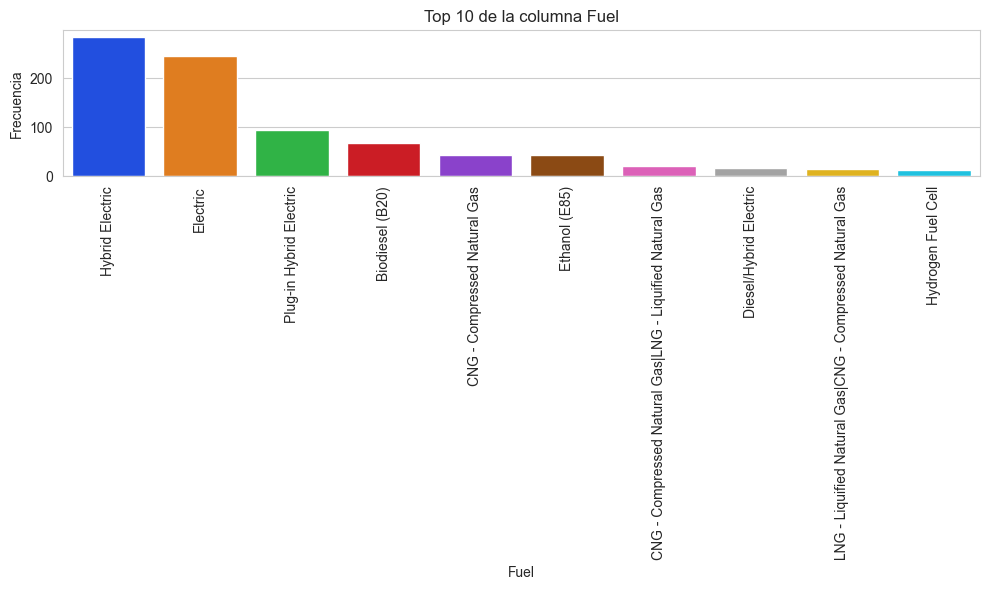

In [220]:
col = 'Fuel'
top_10 = df[col].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette="bright")
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.title(f'Top 10 de la columna {col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [221]:
top_10

Fuel
Hybrid Electric                                             284
Electric                                                    246
Plug-in Hybrid Electric                                      95
Biodiesel (B20)                                              68
CNG - Compressed Natural Gas                                 44
Ethanol (E85)                                                43
CNG - Compressed Natural Gas|LNG - Liquified Natural Gas     22
Diesel/Hybrid Electric                                       17
LNG - Liquified Natural Gas|CNG - Compressed Natural Gas     15
Hydrogen Fuel Cell                                           14
Name: count, dtype: int64

Se puede notar como el tipo de combustible que predimina es el Hibrido Electrico, es decir autos electricos con combustible convencional como gasolina o diesel.
La diferencia no es muy grande entre el primero y segundo tipo, donde se encuentra el tipo Electrico


---
All range electric
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\4006909589.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


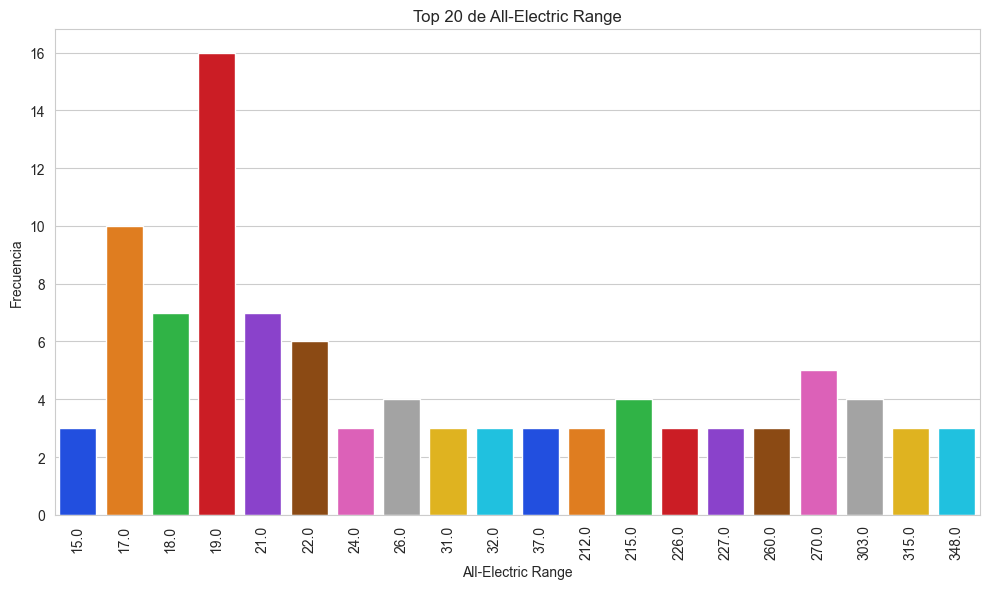

In [222]:
col = 'All-Electric Range'
top_20 = df[col].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.title(f'Top 20 de {col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [223]:
top_20.sort_values(ascending=False)

All-Electric Range
19.0     16
17.0     10
18.0      7
21.0      7
22.0      6
270.0     5
26.0      4
215.0     4
303.0     4
15.0      3
227.0     3
348.0     3
31.0      3
32.0      3
315.0     3
37.0      3
226.0     3
260.0     3
24.0      3
212.0     3
Name: count, dtype: int64

Se puede observar que la autonomía de autos con el combustible totalmente eléctrico, es mayor en 16 autos con 19 km de autonomia
seguido con 10 km, 7 en dos ocasiones 6 y 5

---
PHEV Total Range
---
---
Se refiere al Rango Total de un Vehículo Hibrido enchufable

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2609581366.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.index, y=top_10.values, palette="bright")


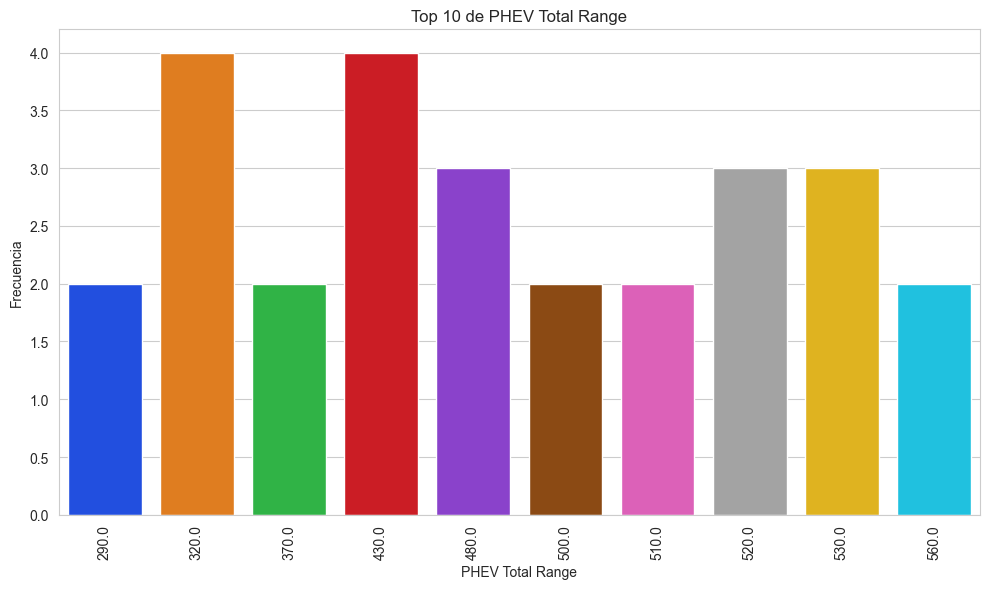

In [224]:
col = 'PHEV Total Range'
top_10 = df[col].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, palette="bright")
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.title(f'Top 10 de {col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [225]:
top_10.sort_values(ascending=False)

PHEV Total Range
430.0    4
320.0    4
480.0    3
530.0    3
520.0    3
500.0    2
290.0    2
510.0    2
370.0    2
560.0    2
Name: count, dtype: int64

La tabla anterior indica la autonomía de vehiculos Hibridos Enchufables
siendo de 430 km el de mayor autonomía seguido de 320 y 480 para un top 3

---
Alternative Fuel Economy City
---
---
Esta columna indica el Consumo de combustible alternativo (gas, etanol o hidrógeno) en ciudad

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2210916684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


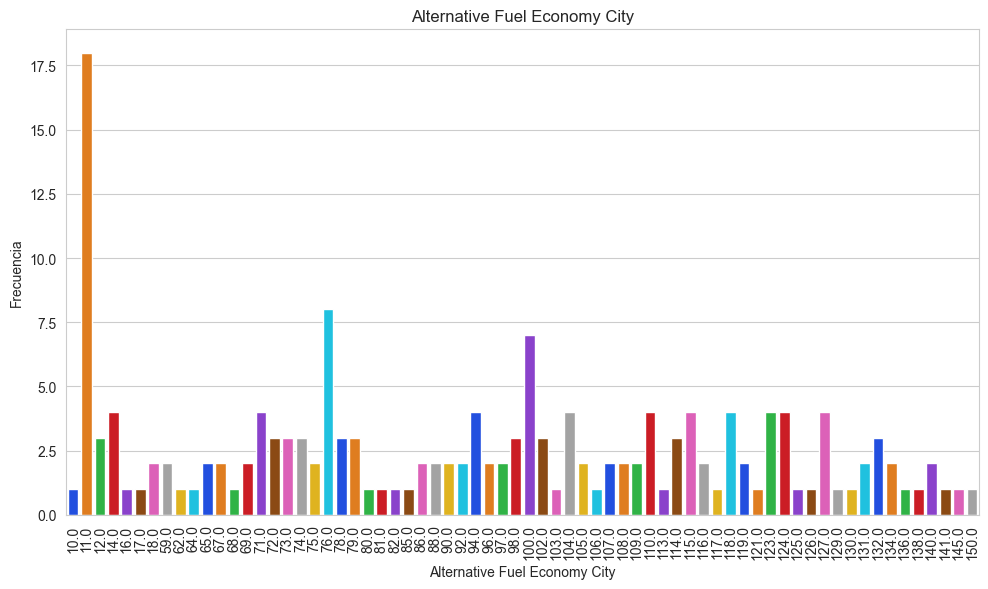

In [226]:
col = 'Alternative Fuel Economy City'
top_20 = df[col].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel(col)
plt.ylabel('Frecuencia')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [227]:
top_20.sort_index(ascending=False)

Alternative Fuel Economy City
150.0     1
145.0     1
141.0     1
140.0     2
138.0     1
         ..
16.0      1
14.0      4
12.0      3
11.0     18
10.0      1
Name: count, Length: 68, dtype: int64

Los combustibles alternativos suelen no tener demasiado rendimiento en Ciudad, siendo 18 autos los que alcanzan una eficiencia de 11km que es poca.
El rendimiento mayor de 132 km lo alcanzan solo 3 autos
sin embargo realizando un rango de aquellos autos que alcanzan distacias mayores a 100 km suman 43 autos
Cabe destacar que son pocas las distancias alcanzadas comparaas entre Electricos, Hibridos y Combustibles alternativos

---
Alternative Fuel Economy Highway
---
---
Esta columna indica el Consumo de combustible alternativo (gas, etanol o hidrógeno) en carretera


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2739808736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


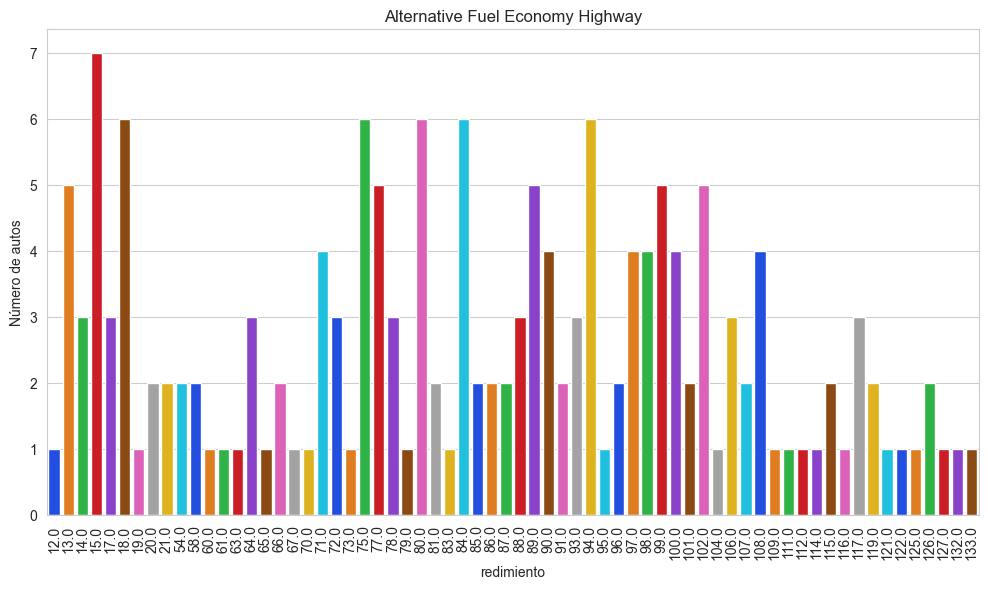

In [228]:
col = 'Alternative Fuel Economy Highway'
top_20 = df[col].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('redimiento')
plt.ylabel('Número de autos')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

El consumo de combustible por conduccion en carretera, es menor sin embargo no es demasiado

---
Alternative Fuel Economy Combined
---
---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3236580359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


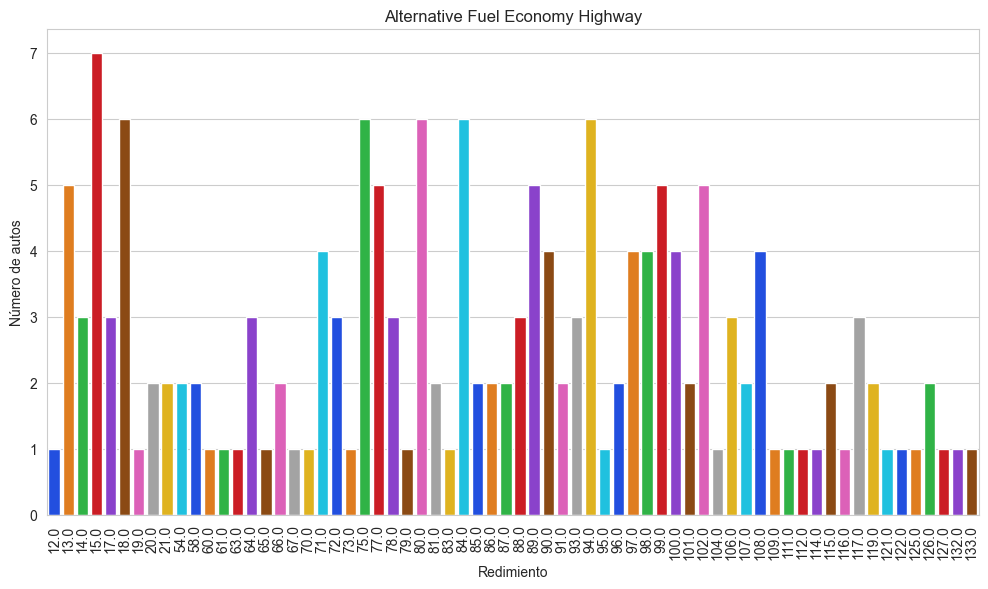

In [229]:
col = 'Alternative Fuel Economy Highway'
top_20 = df[col].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Redimiento')
plt.ylabel('Número de autos')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

Es importante saber que el máximo rendimiento de combustible de autosd por conduciion en carrretera es de 133 km por carga

---
Alternative Fuel Economy Combined
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3687253928.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


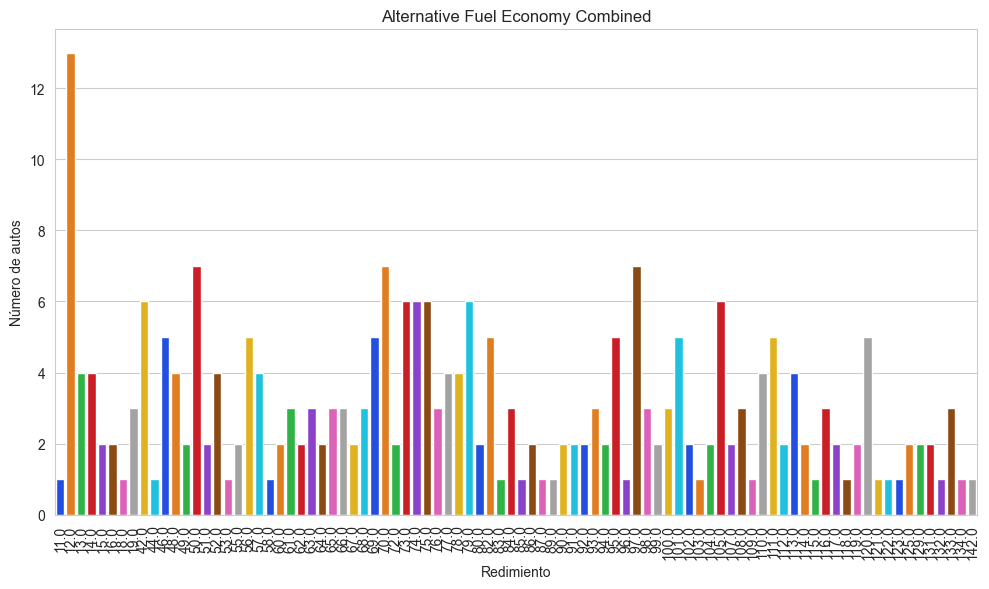

In [230]:
col = 'Alternative Fuel Economy Combined'
top_20 = df[col].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Redimiento')
plt.ylabel('Número de autos')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

El maximo rendimiento de conduccion por combustible alternativo es de 142 km por carga, poco comparado con los autos electricos

---
Conventional Fuel Economy City
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2625626095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


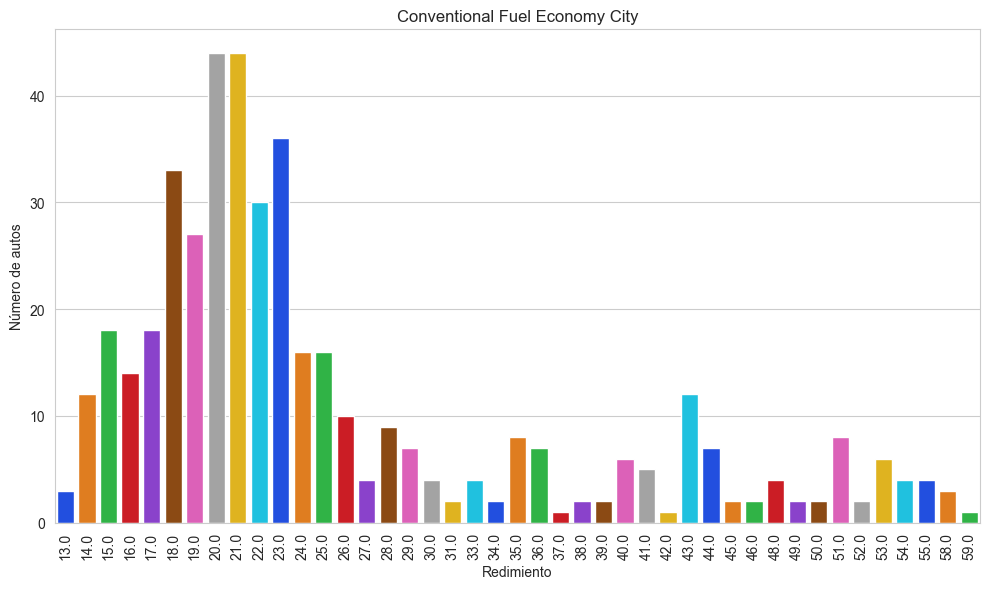

In [231]:
col = 'Conventional Fuel Economy City'
top_20 = df[col].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Redimiento')
plt.ylabel('Número de autos')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

El máximo rendimiento del combustible convencional (diesel o gasolina) es de 59 km mucho menor que el combustible alternativo y los de tipo electrico

---
Conventional Fuel Economy Highway
---
---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2063353711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


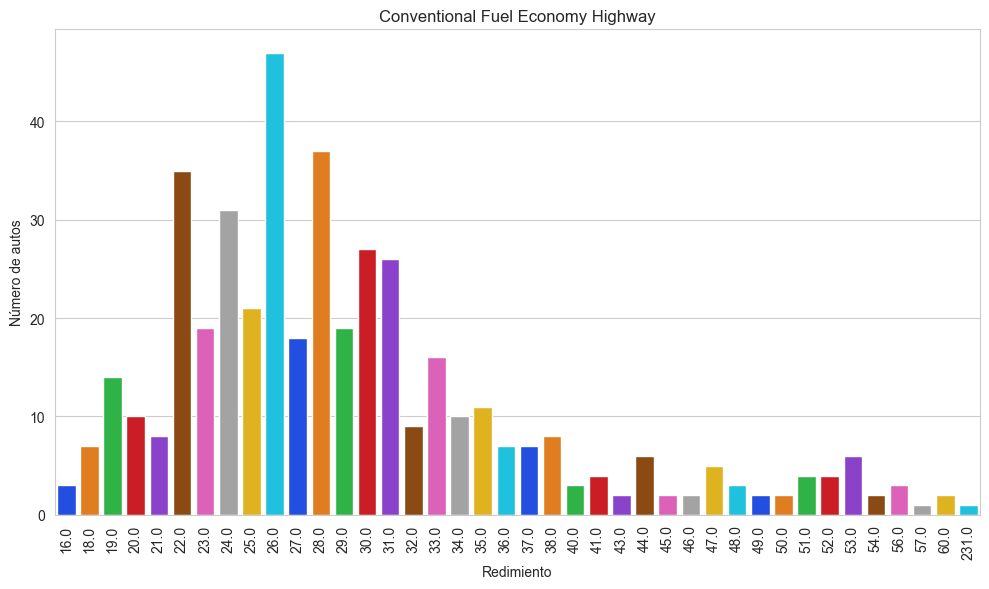

In [232]:
col = 'Conventional Fuel Economy Highway'
top_20 = df[col].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Redimiento')
plt.ylabel('Número de autos')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

De igual forma el combustible convencional en carretera es inferior al electrico 

---
Conventional Fuel Economy Combined
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3589382203.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


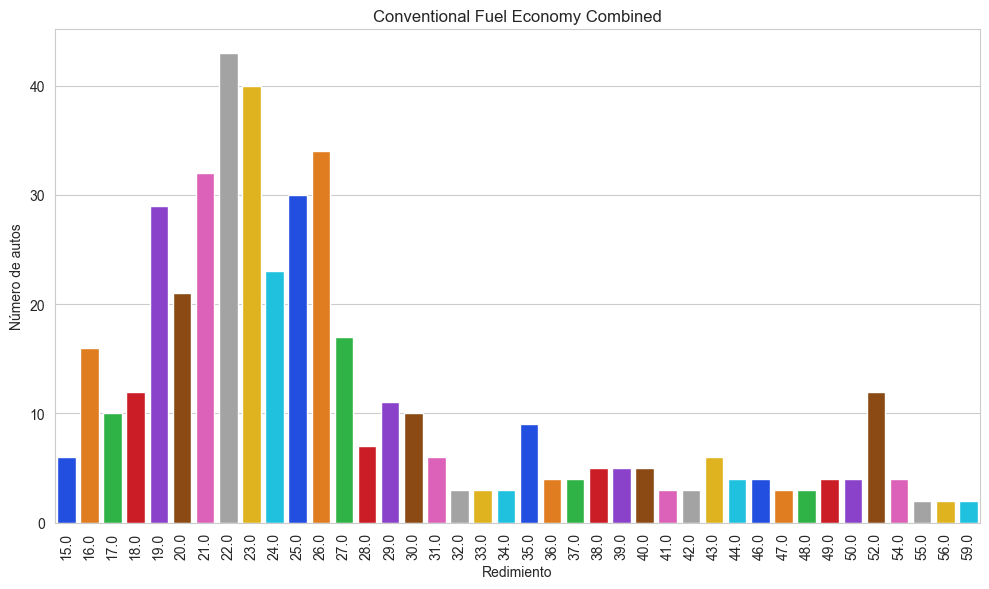

In [233]:
col = 'Conventional Fuel Economy Combined'
top_20 = df[col].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Redimiento')
plt.ylabel('Número de autos')
plt.title(f'{col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

---
Transmissiion type
---
---


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\1219095941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=colum, data=df, palette='bright')


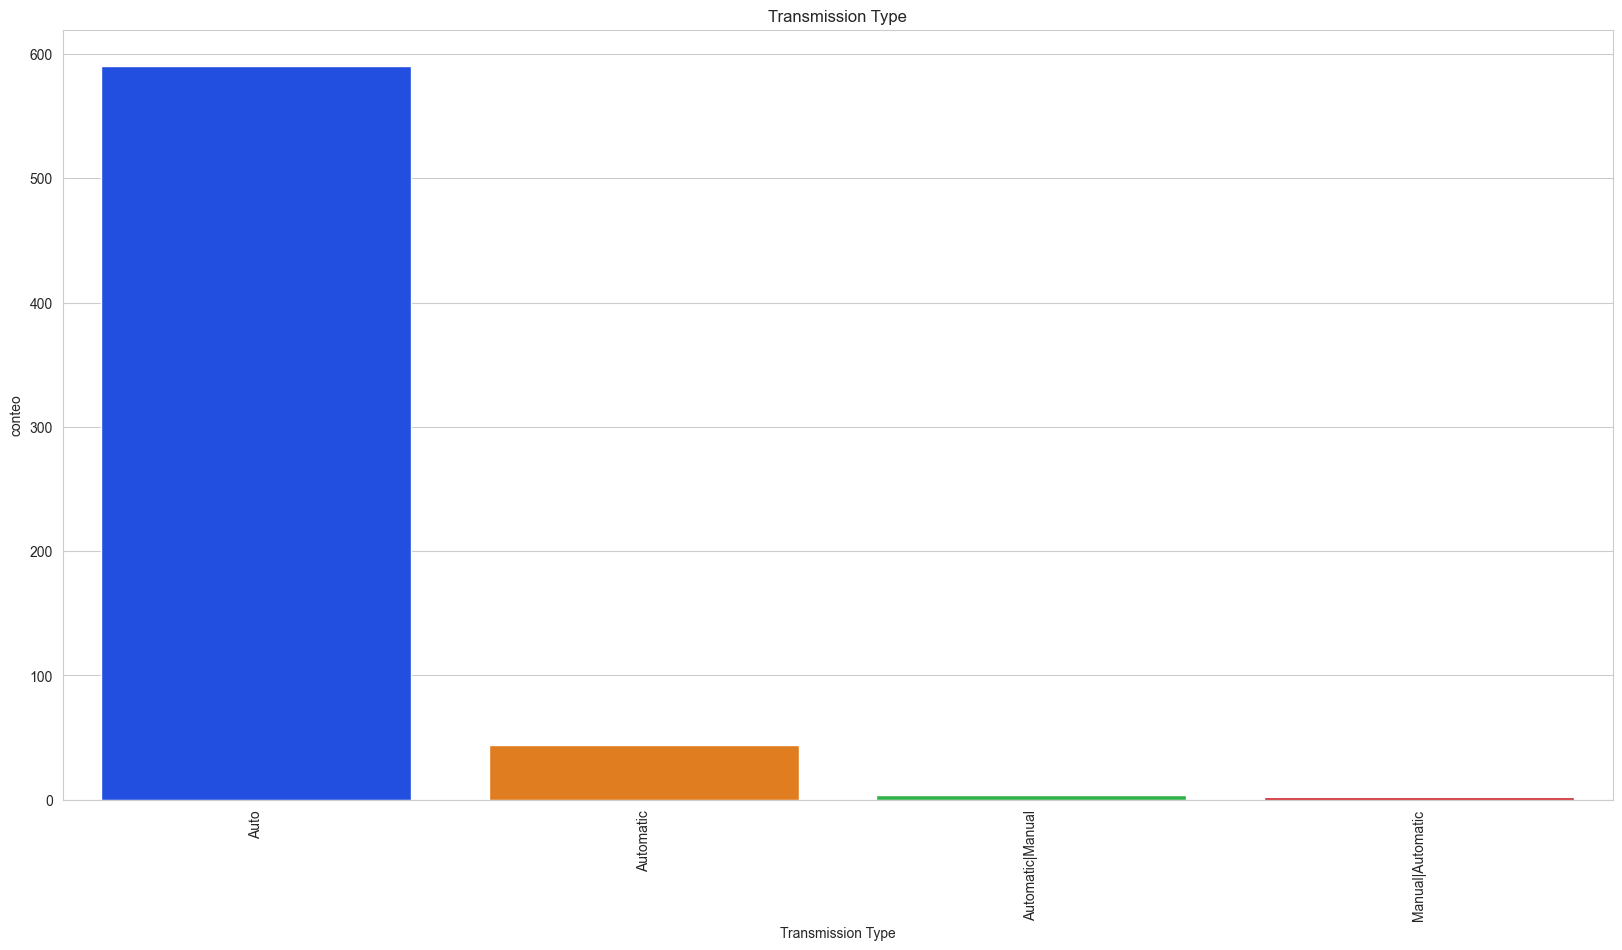

In [234]:
colum = 'Transmission Type'
plt.figure(figsize=(20, 10))
sns.countplot(x=colum, data=df, palette='bright')
plt.title(colum)
plt.xlabel(colum)
plt.ylabel('conteo')
plt.xticks(rotation=90)
plt.show()

In [235]:
df[colum].value_counts()

Transmission Type
Auto                590
Automatic            44
Automatic|Manual      4
Manual|Automatic      2
Name: count, dtype: int64

---
Trnasmission Make
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3806966257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=colum, data=df, palette='bright')


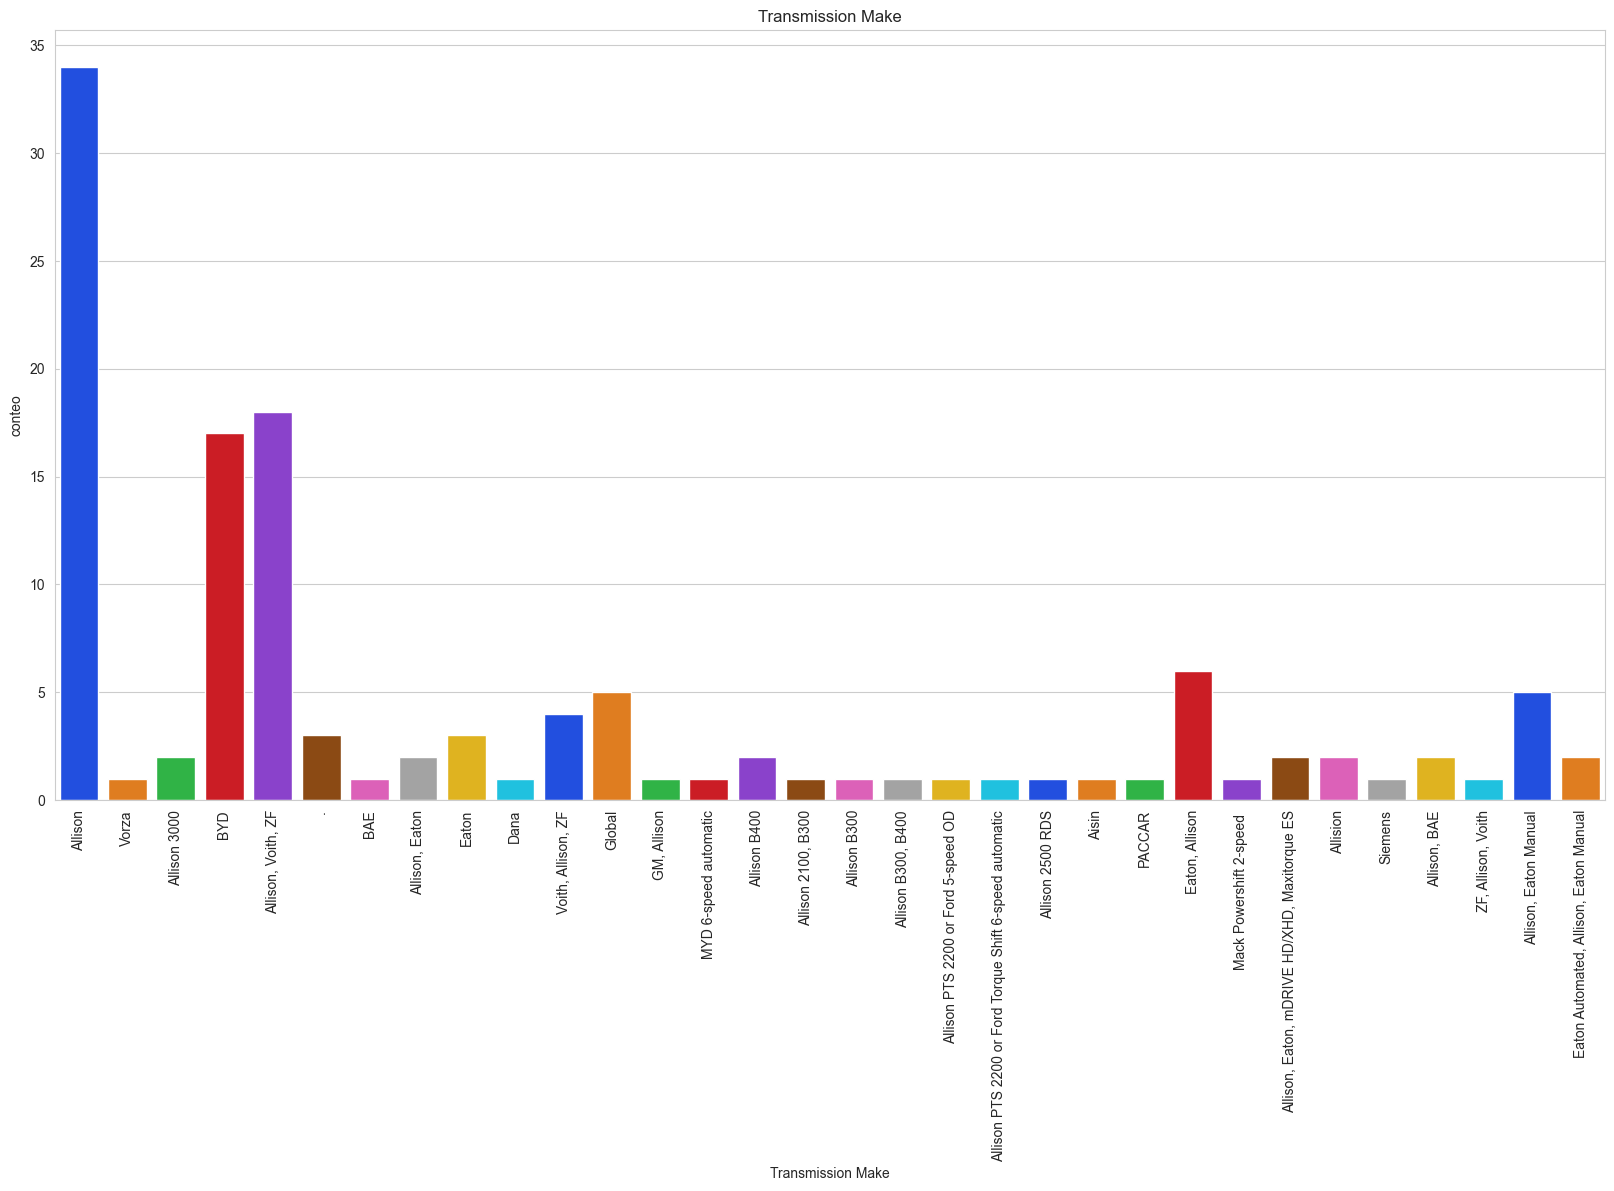

In [236]:
colum = 'Transmission Make'
plt.figure(figsize=(20, 10))
sns.countplot(x=colum, data=df, palette='bright')
plt.title(colum)
plt.xlabel(colum)
plt.ylabel('conteo')
plt.xticks(rotation=90)
plt.show()

In [237]:
df[colum].value_counts().nlargest(10).sort_values(ascending=False)

Transmission Make
Allison                  34
Allison, Voith, ZF       18
BYD                      17
Eaton, Allison            6
Allison, Eaton Manual     5
Global                    5
Voith, Allison, ZF        4
.                         3
Eaton                     3
Allison B400              2
Name: count, dtype: int64

---
Engine Type
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\938439515.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=colum, data=df, palette='bright')


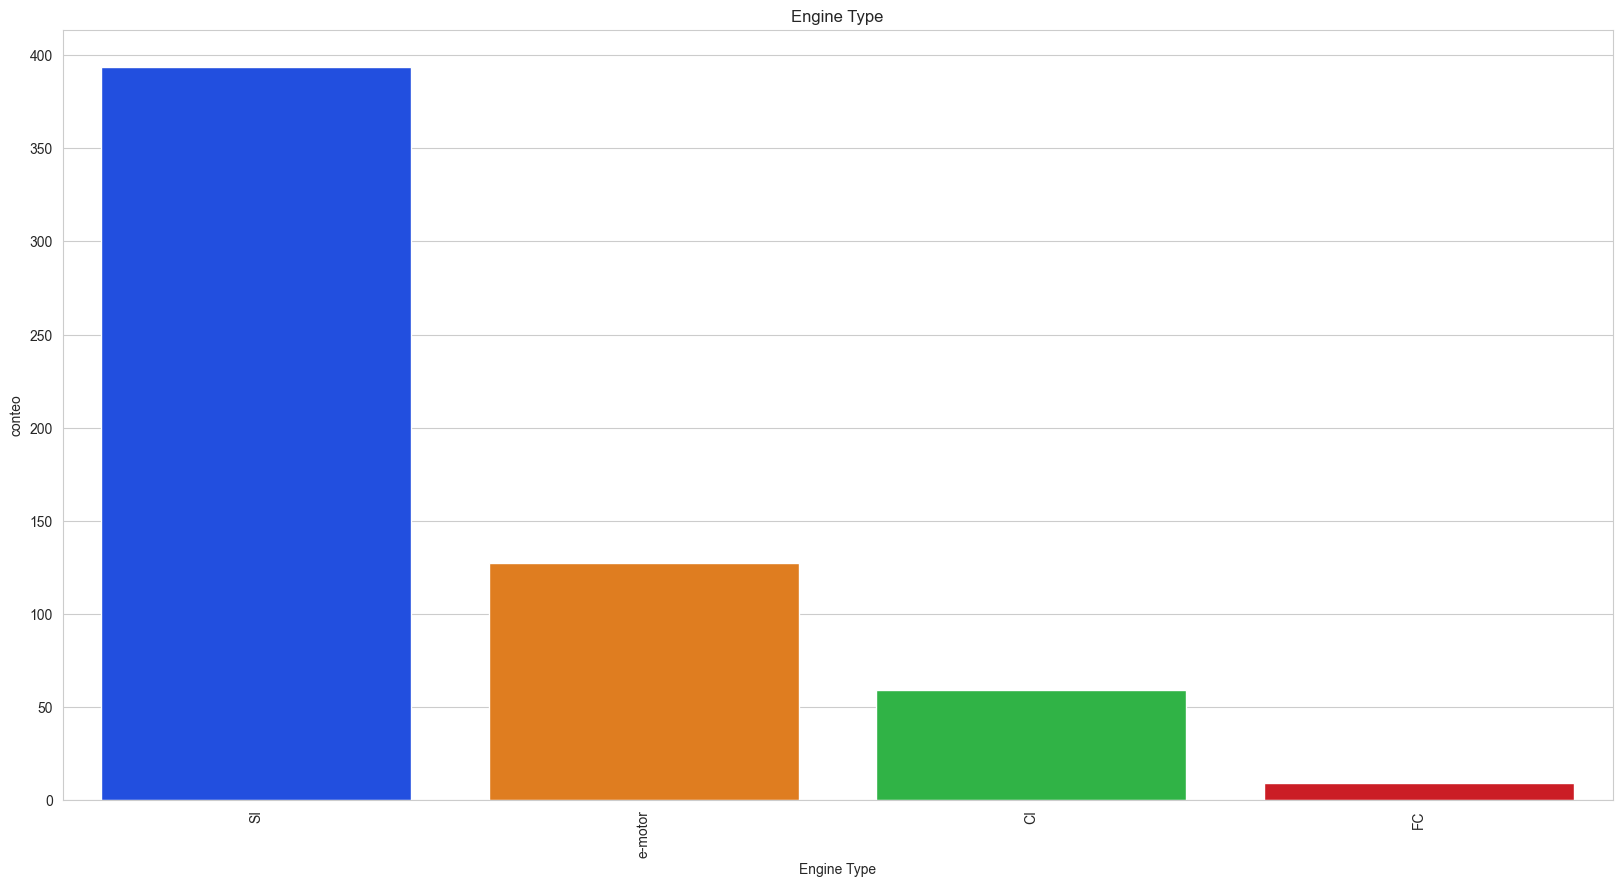

In [238]:
colum = 'Engine Type'
plt.figure(figsize=(20, 10))
sns.countplot(x=colum, data=df, palette='bright')
plt.title(colum)
plt.xlabel(colum)
plt.ylabel('conteo')
plt.xticks(rotation=90)
plt.show()

In [239]:
df[colum].value_counts().nlargest(10).sort_values(ascending=False)

Engine Type
SI         394
e-motor    127
CI          59
FC           9
Name: count, dtype: int64

Un motor SI de combustión interna, generalmente un motor de gasolina, donde el proceso de combustión de la mezcla de aire y combustible se enciende mediante una chispa de una bujía.
El e-motor es un motor electrico en el cual se transforma la energia electrica en energia mecanica.
El motor CI es de combustible diésel que se inyecta en la cámara de combustión del motor y se enciende por las altas temperaturas que se alcanzan cuando el gas es comprimido por el pistón del motor.
El motor FC es de tipo de motor a gasolina o diesel

---
Engine Size
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2937089506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


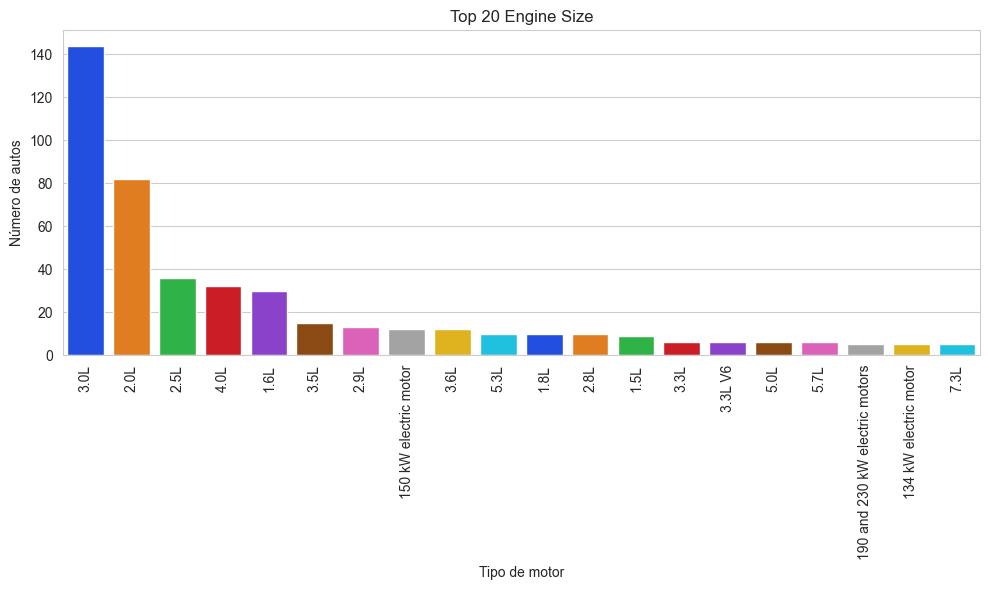

In [240]:
col = 'Engine Size'
top_20 = df[col].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Tipo de motor')
plt.ylabel('Número de autos')
plt.title(f'Top 20 {col}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [241]:
# Se llenan los valores nulos con un valor vacio para ser convertirdo en str
df_fill = df['Engine Size'].fillna('')
# se filtran todos aquellos valores donde exista la palabra electric como dato
df_electric = df_fill[df_fill.str.contains('electric', case=False)]
# se calculan las frecuencias de los valores de motores eléctricos más reperidos 
frecuencia = df_electric.value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\2849820338.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="bright")


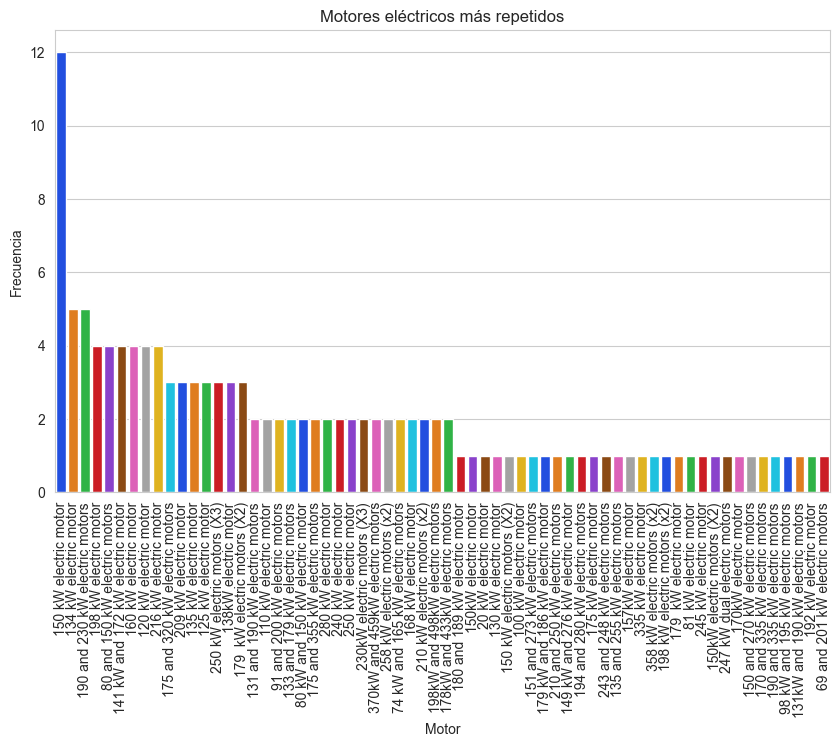

In [242]:
# Se grafican los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="bright")
plt.xlabel('Motor')
plt.ylabel('Frecuencia')
plt.title('Motores eléctricos más repetidos')
plt.xticks(rotation=90)
plt.show()

In [243]:
# Motores electricos màs repetidos
frecuencia

Engine Size
150 kW electric motor               12
134 kW electric motor                5
190 and 230 kW electric motors       5
198 kW electric motor                4
80 and 150 kW electric motors        4
                                    ..
190 and 335 kW electric motors       1
98 kW and 195 kW electric motors     1
131kW and 190 kW electric motors     1
192 kW electric motor                1
69 and 201 kW electric motors        1
Name: count, Length: 64, dtype: int64

El motor de combustion mayormente usado es de 3.0L mientras que el motor electrico más usado es de 150kW

---
Engine cylinder count
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\1849321629.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=colum, data=df, palette='bright')


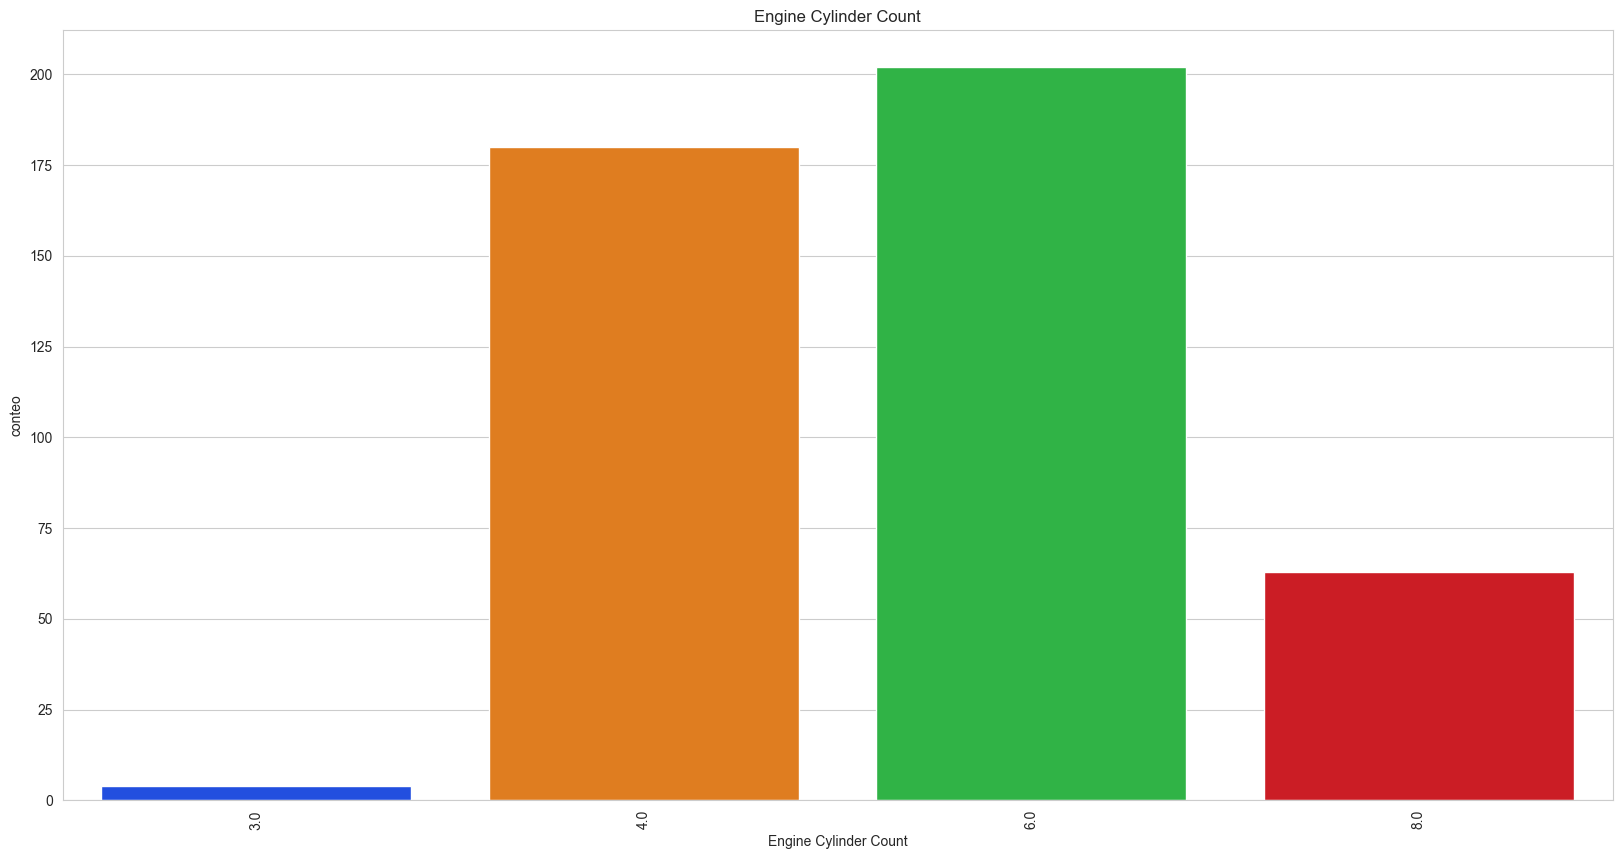

In [244]:
colum = 'Engine Cylinder Count'
plt.figure(figsize=(20, 10))
sns.countplot(x=colum, data=df, palette='bright')
plt.title(colum)
plt.xlabel(colum)
plt.ylabel('conteo')
plt.xticks(rotation=90)
plt.show()

In [245]:
df['Engine Cylinder Count'].value_counts()

Engine Cylinder Count
6.0    202
4.0    180
8.0     63
3.0      4
Name: count, dtype: int64

El motor de combustión myormente usado es el de 6.0L seguido el de 4.0L

---
Nu8mber of passengers
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\299738429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")


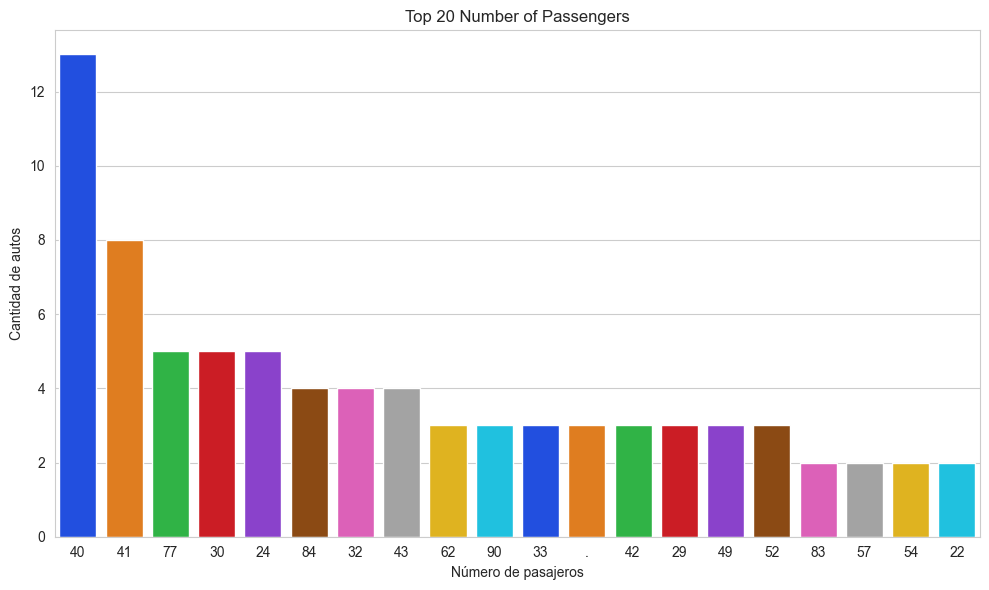

In [246]:
colum = 'Number of Passengers'
top_20 = df[colum].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Número de pasajeros')
plt.ylabel('Cantidad de autos')
plt.title(f'Top 20 {colum}')
# plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [247]:
top_20

Number of Passengers
40    13
41     8
77     5
30     5
24     5
84     4
32     4
43     4
62     3
90     3
33     3
.      3
42     3
29     3
49     3
52     3
83     2
57     2
54     2
22     2
Name: count, dtype: int64

---
Heavy-Duty Power System, Capacidad de potencia del vehículo 
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3273728072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3273728072.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


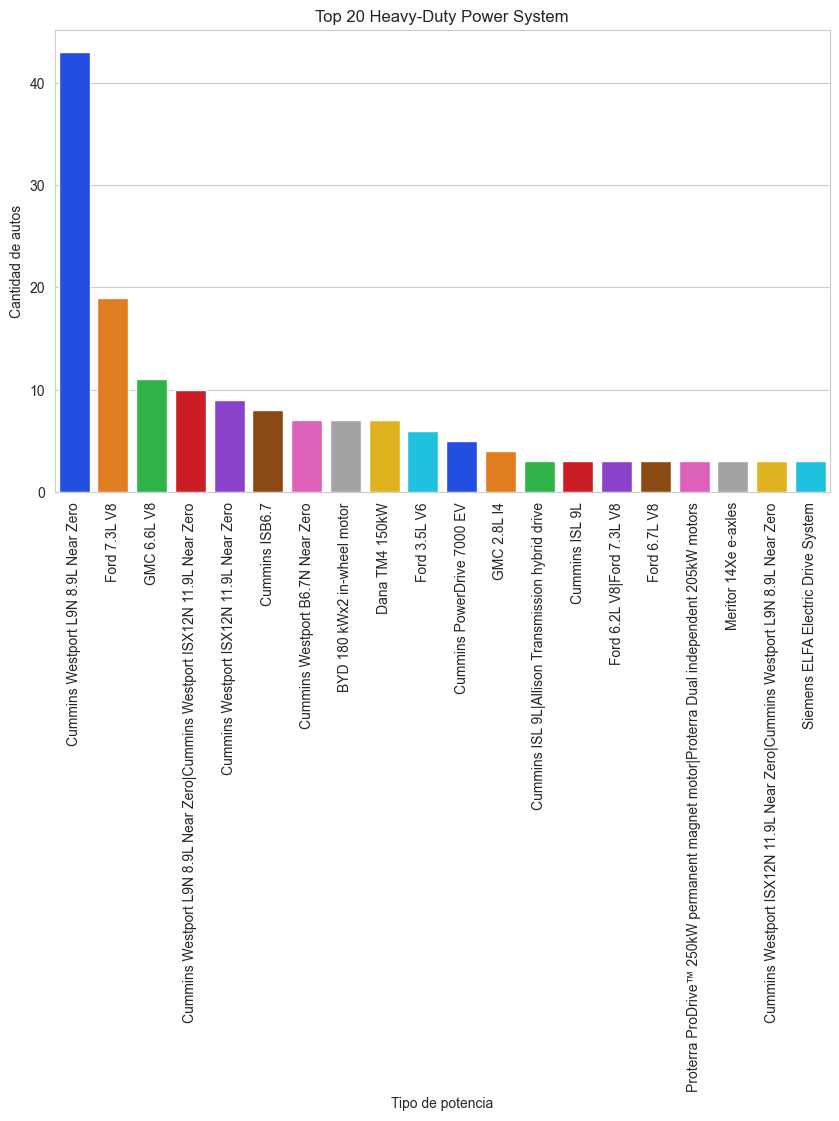

In [248]:
colum = 'Heavy-Duty Power System'
top_20 = df[colum].value_counts().nlargest(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20.index, y=top_20.values, palette="bright")
plt.xlabel('Tipo de potencia')
plt.ylabel('Cantidad de autos')
plt.title(f'Top 20 {colum}')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

In [249]:
# Se llenan los valores nulos con un valor vacio para ser convertirdo en str
df_fill = df[colum].fillna('')
# se filtran todos aquellos valores donde exista la palabra electric como dato
df_electric = df_fill[df_fill.str.contains('electric', case=False)]
# se calculan las frecuencias de los valores de motores eléctricos más reperidos 
frecuencia = df_electric.value_counts()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\3492974136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="bright")


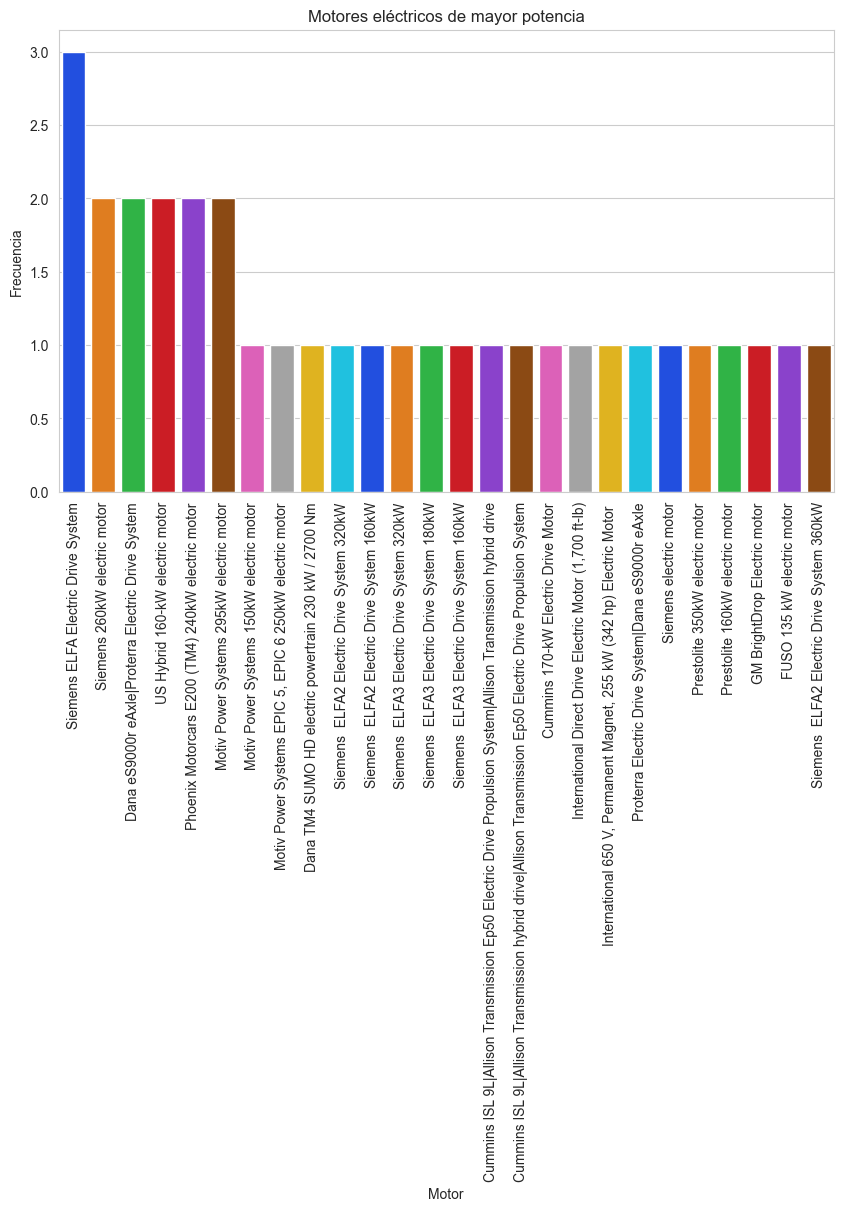

In [250]:
# Se grafican los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia.index, y=frecuencia.values, palette="bright")
plt.xlabel('Motor')
plt.ylabel('Frecuencia')
plt.title('Motores eléctricos de mayor potencia')
plt.xticks(rotation=90)
plt.show()

---
Drivetrain - Tren Motriz
---
---

C:\Users\Usuario\AppData\Local\Temp\ipykernel_19628\503351256.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=colum, data=df, palette='bright')


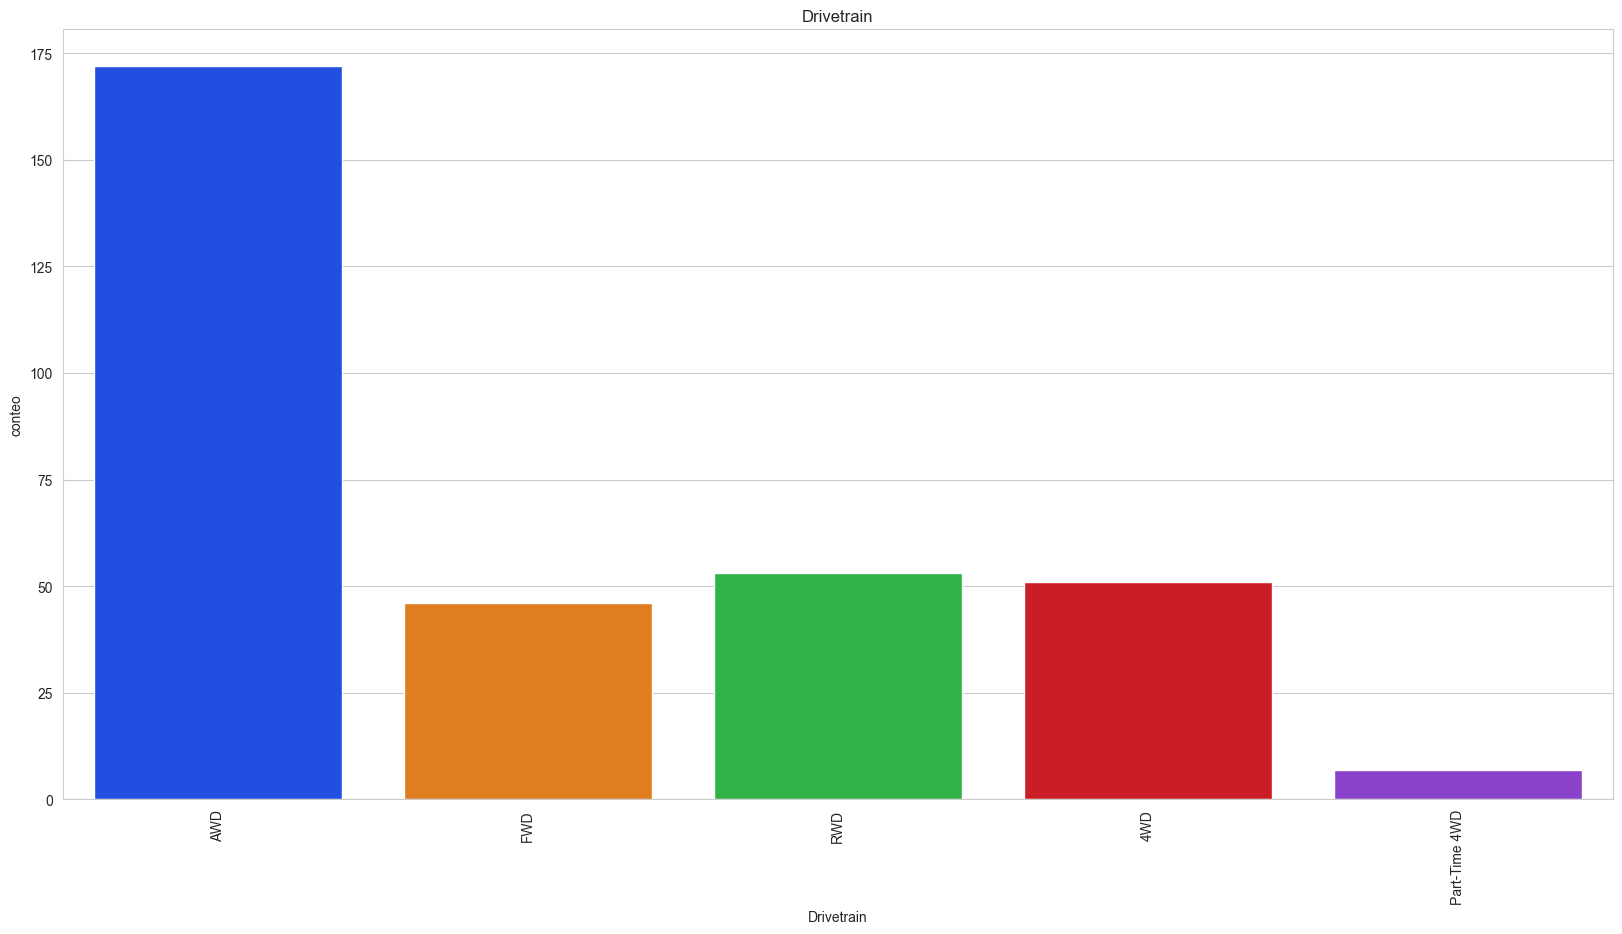

In [251]:
colum = 'Drivetrain'
plt.figure(figsize=(20, 10))
sns.countplot(x=colum, data=df, palette='bright')
plt.title(colum)
plt.xlabel(colum)
plt.ylabel('conteo')
plt.xticks(rotation=90)
plt.show()

El tren motriz mas común es el de tracción en las cuatro ruedas

a.	- AWD (All-Wheel Drive): La potencia se transmite a todas las ruedas.

b.	- FWD (Front-Wheel Drive): La potencia se transmite solo a las ruedas delanteras.

c.	- RWD (Rear-Wheel Drive): La potencia se transmite solo a las ruedas traseras.

d.	- 4WD (Four-Wheel Drive): La potencia se transmite a todas las ruedas, pero el conductor puede seleccionar entre diferentes modos de conducción.
